# An√°lise do corpus, pipeline e Bag of Words

Neste notebook sera a an√°lise de todo o corpus e tamb√©m ser√£o feitas as transforma√ß√µes b√°sicas no dataset. 
O objetivo com este notebook √© analisar todos os dados e gerar um csv que j√° cont√©m todo o texto tokenizado e sem stop words. Al√©m disso, sera gerado o resultado do modelo Bag of Words.
Na imagem abaixo, cont√©m um diagrama de como essas etapas funcionam e no decorrer do notebook ser√° entrado em mais detalhes sobre cada etapa espec√≠fica.

## An√°lise do corpus

### Importando bibliotecas

In [53]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import nltk
import string  
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Abrindo a base de dados 
df = pd.read_excel('../base/base.xlsx', index_col=0)
df_initialprocessing = pd.read_csv('../output/TratamentoInicial.csv')
df_tokenizationStopWords = pd.read_csv('../output/ResultadoProcessamento.csv')
df_bagOfWords = pd.read_csv('../output/ResultadoBow.csv')

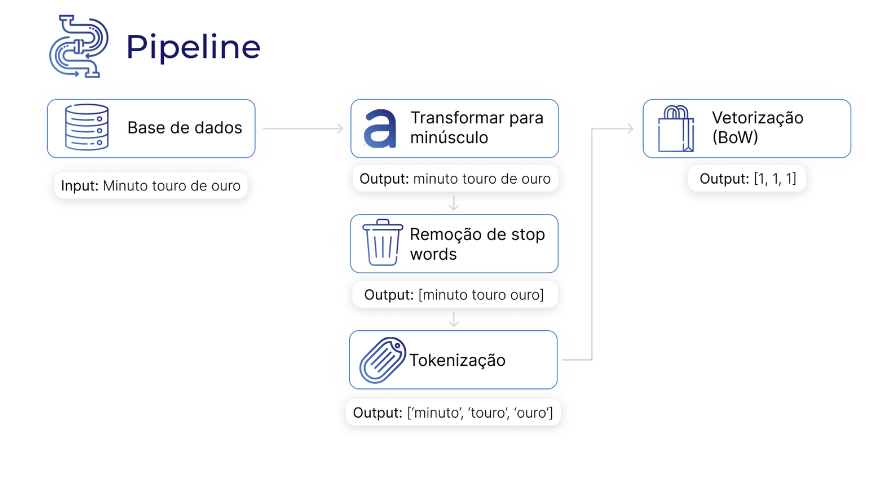

An√°lise da porcentagem dos coment√°rios do BTG Pactual em rela√ß√£o aos outros coment√°rios dos usu√°rios no Instagram.

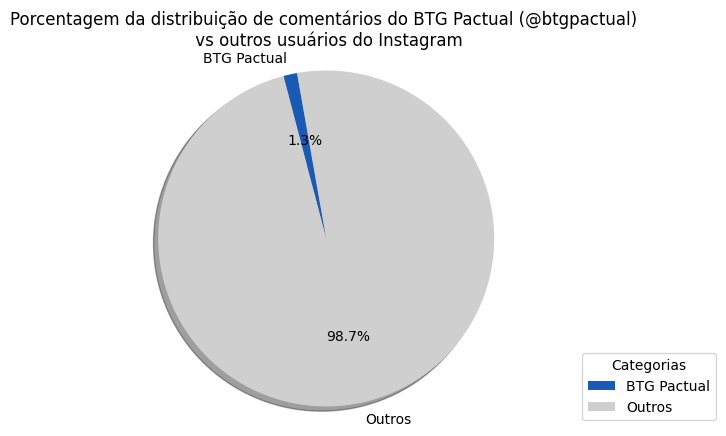

In [56]:
# Contagem de coment√°rios feitos pelo BTG Pactual
num_comments_btg = len(df[df['"autor"'] == 'btgpactual'])

# Contagem de coment√°rios feitos por outros usu√°rios
num_comments_others = len(df[df['"autor"'] != 'btgpactual'])

# C√°lculo das porcentagens
total_comments = num_comments_btg + num_comments_others
btg_percentage = (num_comments_btg / total_comments) * 100
others_percentage = (num_comments_others / total_comments) * 100


# Definindo as cores
colors = ['#195AB4', '#CFCFCF']

# Cria√ß√£o do gr√°fico de pizza
labels = ['BTG Pactual', 'Outros']
sizes = [btg_percentage, others_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=colors)
ax1.axis('equal')
ax1.set_title('Porcentagem da distribui√ß√£o de coment√°rios do BTG Pactual (@btgpactual) \n vs outros usu√°rios do Instagram')
ax1.legend(title='Categorias', loc='center right', bbox_to_anchor=(1.3, 0.1))
plt.show()

An√°lise da quantidade de palavras ap√≥s cada etapa do pr√©-processamento:



In [57]:
# Base original fornecida pelo BTG Pactual (df)
df['Num Words'] = df['"texto"'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' da base original: ", df['"texto"'].str.split().str.len().sum())

# Base ap√≥s remo√ß√£o dos coment√°rios do BTG Pactual (df_tratamentoInicial)
df_initialprocessing['Num Words'] = df_initialprocessing['texto'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - dfClean: ", df_initialprocessing['texto'].str.split().str.len().sum())

# Base ap√≥s tokeniza√ß√£o e remo√ß√£o de stopwords (df_tokeniza√ß√£oStopWords)
df_tokenizationStopWords['Num Words'] = df_tokenizationStopWords['Frases_sem_stop_words'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - df_semstopwords: ", df_tokenizationStopWords['Frases_sem_stop_words'].str.split().str.len().sum())

# Base ap√≥s bag of words (df_bagOfWords)
df_bagOfWords['Num Words'] = df_bagOfWords['Palavra'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'Palavra' - df_final: ", df_bagOfWords['Palavra'].str.split().str.len().sum())


Quantidade de palavras na coluna 'texto' da base original:  522820
Quantidade de palavras na coluna 'texto' - dfClean:  96218
Quantidade de palavras na coluna 'texto' - df_semstopwords:  42283
Quantidade de palavras na coluna 'Palavra' - df_final:  7597


### Gr√°fico dos resultados das palavras ap√≥s cada etapa do pr√©-processamento.


In [58]:

df_initialprocessing
df_tokenizationStopWords
df_bagOfWords

Palavra  Frequ√™ncia  Num Words
0           banco         475          1
1             btg         408          1
2             pra         386          1
3          limite         363          1
4           conta         319          1
...           ...         ...        ...
7592  organizando           1          1
7593   adiantando           1          1
7594    iniciaria           1          1
7595     cumprido           1          1
7596      spotify           1          1

[7597 rows x 3 columns]

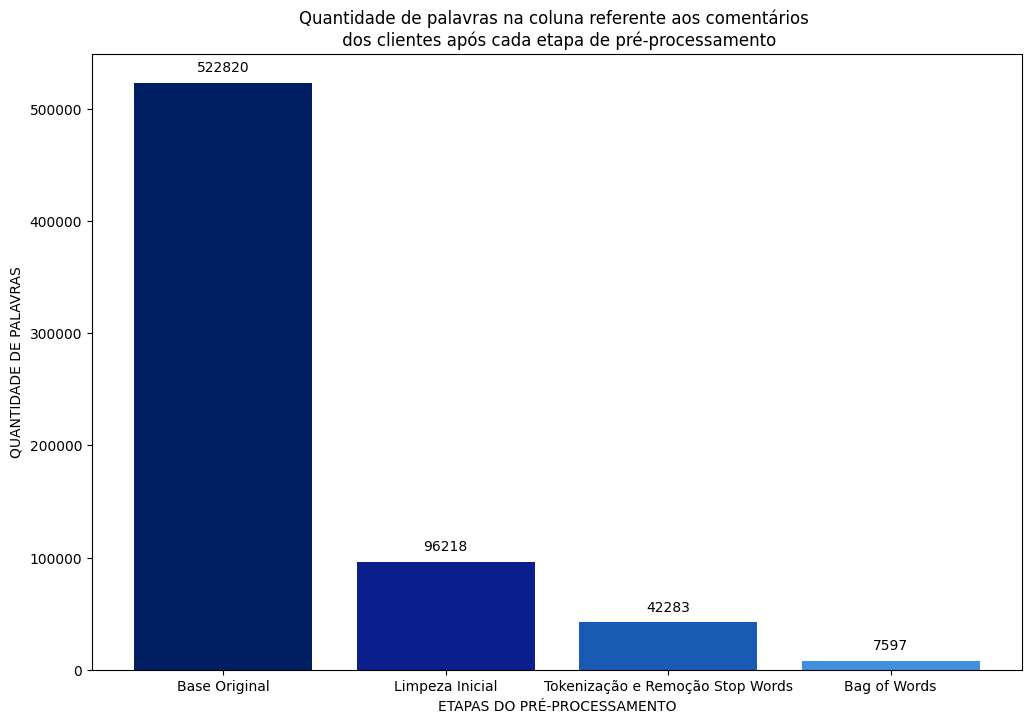

In [59]:
# Definindo a quantidade de palavras em cada base
word_count = [df['"texto"'].str.split().apply(len).sum(),
              df_initialprocessing['texto'].str.split().apply(len).sum(),
              df_tokenizationStopWords['Frases_sem_stop_words'].str.split().apply(len).sum(),
              df_bagOfWords['Palavra'].str.split().apply(len).sum()]

# Definindo os r√≥tulos para cada pr√©-processamento
labels = ['Base Original', 'Limpeza Inicial', 'Tokeniza√ß√£o e Remo√ß√£o Stop Words', 'Bag of Words']

# Criando um gr√°fico de barras
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(labels, word_count)

# Adicionando r√≥tulos aos eixos e t√≠tulo ao gr√°fico
ax.set_xlabel('ETAPAS DO PR√â-PROCESSAMENTO')
ax.set_ylabel('QUANTIDADE DE PALAVRAS')
ax.set_title('Quantidade de palavras na coluna referente aos coment√°rios \n dos clientes ap√≥s cada etapa de pr√©-processamento')

# Adicionando os n√∫meros de palavras acima de cada barra
for i, v in enumerate(word_count):
    ax.text(i, v + 10000, str(v), ha='center')

colors = ['#001E62', '#0A1E8C', '#195AB4', '#418FDE']
ax.bar(labels, word_count, color=colors)

# Mostrando o gr√°fico
plt.show()


### An√°lise do n√∫mero de linhas e colunas da primeira e da √∫ltima base.



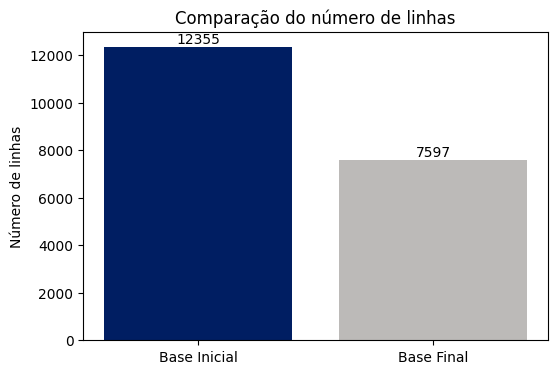

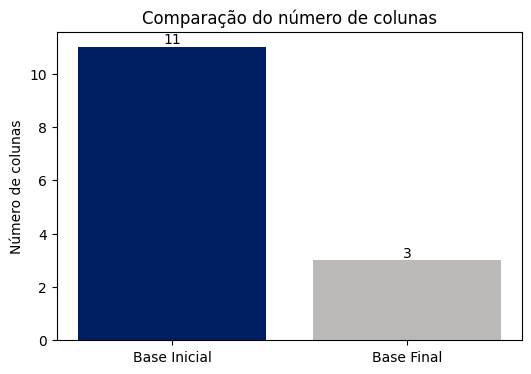

In [60]:
# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gr√°fico de barras para as linhas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara√ß√£o do n√∫mero de linhas')
ax.set_ylabel('N√∫mero de linhas')

# Adiciona o n√∫mero respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.1),  # desloca o texto 0.1 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gr√°fico de barras para as colunas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara√ß√£o do n√∫mero de colunas')
ax.set_ylabel('N√∫mero de colunas')

# Adiciona o n√∫mero respectivo em cima de cada barra
autolabel(rects2)
plt.show()


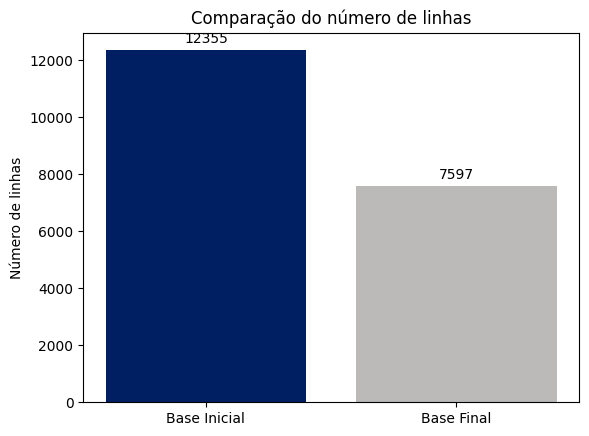

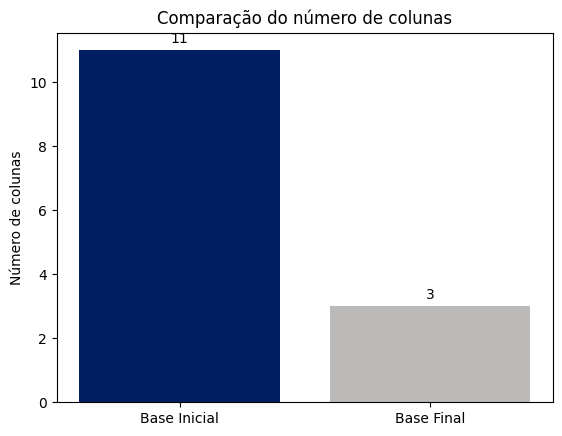

In [61]:
# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gr√°fico de barras para as linhas
fig, ax = plt.subplots()
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara√ß√£o do n√∫mero de linhas')
ax.set_ylabel('N√∫mero de linhas')

# Adiciona o n√∫mero respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # desloca o texto 3 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gr√°fico de barras para as colunas
fig, ax = plt.subplots()
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara√ß√£o do n√∫mero de colunas')
ax.set_ylabel('N√∫mero de colunas')

# Adiciona o n√∫mero respectivo em cima de cada barra
autolabel(rects2)
plt.show()


## Hip√≥teses do grupo de colunas que afetem e n√£o afetam a an√°lise dos sentimentos dos cliente.



### Colunas que n√£o afetam na an√°lise de sentimento:

Colunas que n√£o afetam na an√°lise de sentimento:
Segundo nossas hip√≥teses, as colunas que podem n√£o estar relacionadas a verifica√ß√£o do sentimento dos clientes do BTG Pactual atrav√©s dos coment√°rios s√£o:

- **id :** esta informa√ß√£o n√£o tem rela√ß√£o direta com o sentimento do cliente e n√£o ajudar√° a entender sua opini√£o sobre seus produtos ou servi√ßos.

- **Autor :** informa√ß√£o n√£o diretamente relacionada ao sentimento do cliente, a menos que haja uma hip√≥tese espec√≠fica sobre isso.

- **Tipo de Intera√ß√£o :** informa√ß√£o n√£o diretamente relacionada ao sentimento do cliente e n√£o ajudar√° a entender sua opini√£o sobre seus produtos ou servi√ßos.

- **Link do post :** informa√ß√£o n√£o diretamente relacionada ao sentimento do cliente e n√£o ajudar√° a entender sua opini√£o sobre seus produtos ou servi√ßos.

- **Processado :** Esta coluna pode ser relevante dependendo do seu objetivo de an√°lise. Se a coluna indicar se um coment√°rio foi processado por um software de an√°lise de sentimento, por exemplo, ela pode ser √∫til para entender a precis√£o dos resultados da an√°lise.

- **Cont√©m Hyperlink :** informa√ß√£o n√£o diretamente relacionada ao sentimento do cliente e n√£o ajudar√° a entender sua opini√£o sobre seus produtos ou servi√ßos.

- **Probabilidade de anomalia :** Esta coluna pode ser relevante dependendo do seu objetivo de an√°lise. Se a coluna indicar a probabilidade de um coment√°rio ser uma anomalia, ela pode ser √∫til para entender a qualidade geral dos dados.

### Colunas que tem rela√ß√£o direta com o resultado da an√°lise de sentimento dos clientes:


J√° as colunas que podem ter rela√ß√£o direta com

- **Texto :** Esta √© a coluna mais importante, pois cont√©m o feedback direto dos clientes sobre seus produtos ou servi√ßos.

- **Data da Publica√ß√£o :** A data pode ser √∫til para detectar tend√™ncias temporais e mudan√ßas na percep√ß√£o do cliente ao longo do tempo.

- **Sentimento :** Esta coluna √© importante, pois √© onde est√° registrado o sentimento do cliente em rela√ß√£o ao produto ou servi√ßo.

### Gr√°fico das colunas relevantes e irrelevantes segundo hip√≥teses feitas pelo grupo.



C:\Users\eduar\AppData\Local\Temp\ipykernel_25228\3943048228.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation=90)


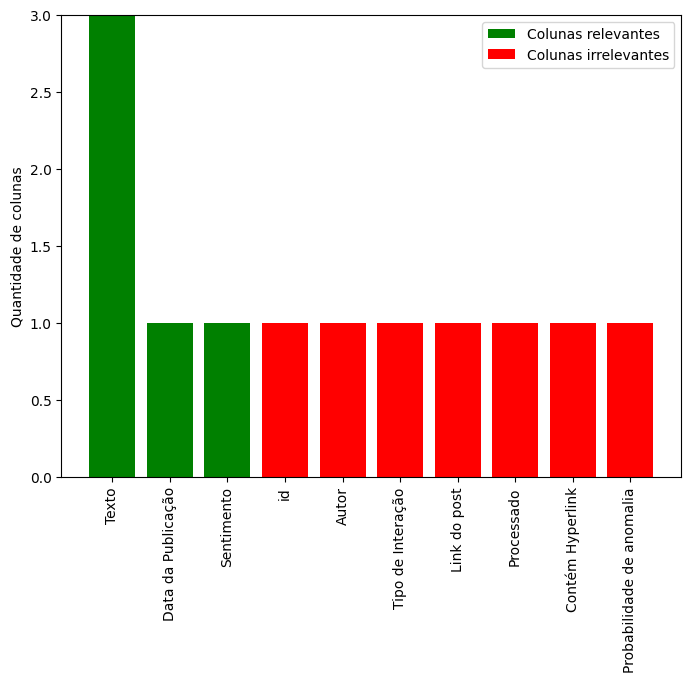

In [62]:

# Definir os dados do gr√°fico
columns = ['Texto', 'Data da Publica√ß√£o', 'Sentimento', 'id', 'Autor', 'Tipo de Intera√ß√£o', 'Link do post', 'Processado', 'Cont√©m Hyperlink', 'Probabilidade de anomalia']
relevant_quantity = [3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
irrelevant_quantity = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Plotar o gr√°fico
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(columns, relevant_quantity, color='green', label='Colunas relevantes')
ax.bar(columns, irrelevant_quantity, bottom=relevant_quantity, color='red', label='Colunas irrelevantes')
ax.set_xticklabels(columns, rotation=90)
ax.set_ylabel('Quantidade de colunas')
ax.legend()

plt.show()

In [63]:
# Contagem de sentimentos
fellings = df_tokenizationStopWords['sentimento'].value_counts()
print(fellings)

# Contagem de palavras na primeira base "df"
words_df = df['"texto"'].str.split().apply(len).sum()
print("N√∫mero total de palavras nos coment√°rios da base inicial:", words_df)

# Contagem de palavras na √∫ltima base
words_df_tokeniza√ß√£oStopWords = df_tokenizationStopWords['texto'].str.split().apply(len).sum()
print("N√∫mero total de palavras nos coment√°rios da base ap√≥s tratamento:", df_tokenizationStopWords)


sentimento
NEUTRAL     2798
NEGATIVE    1952
POSITIVE    1606
Name: count, dtype: int64
N√∫mero total de palavras nos coment√°rios da base inicial: 522820
N√∫mero total de palavras nos coment√°rios da base ap√≥s tratamento:               dataPublicada                     autor   
0     "2022-03-04 08:36:00"                lmviapiana  \
1     "2022-03-03 21:10:00"              vanilson_dos   
2     "2022-03-03 20:54:00"               ricktolledo   
3     "2022-03-03 18:56:00"          claudiofalavinha   
4     "2022-03-03 16:11:00"     paularodrigues.invest   
...                     ...                       ...   
6351  "2022-11-30 07:48:00"  perspectiveinvestimentos   
6352  "2022-11-30 08:42:00"              marlenenelso   
6353  "2022-11-30 11:27:00"            eduardocolares   
6354  "2022-11-30 12:18:00"             jayipacderota   
6355  "2022-11-30 14:27:00"                 bfmarilia   

                                                  texto sentimento   
0                    

### Porcentagem dos sentimentos dos cliente (na porcentagem de neutros h√° a considera√ß√£o de emojis, o que torna o n√∫mero impreciso).



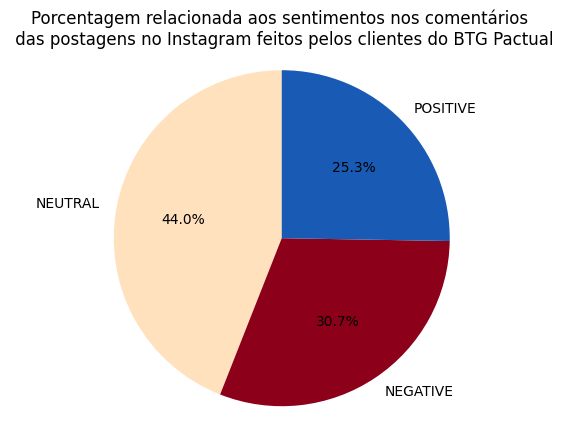

In [64]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_tokenizationStopWords['sentimento'].value_counts()

# Cria um gr√°fico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos coment√°rios \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gr√°fico
plt.show()

Fun√ß√£o "describe" da base de dados inicial.



In [65]:
df.describe()


"anomalia"  "probabilidadeAnomalia"  "processado"  "contemHyperlink"   
count  12355.000000             12355.000000       12355.0       12355.000000  \
mean       0.222339                37.325698           0.0           0.005423   
std        0.415835                16.374936           0.0           0.073443   
min        0.000000                 7.000000           0.0           0.000000   
25%        0.000000                24.000000           0.0           0.000000   
50%        0.000000                37.000000           0.0           0.000000   
75%        0.000000                48.000000           0.0           0.000000   
max        1.000000               100.000000           0.0           1.000000   

          Num Words  
count  12355.000000  
mean      50.273007  
std       62.843977  
min        1.000000  
25%        7.000000  
50%       25.000000  
75%       71.000000  
max      336.000000

In [66]:
# Ordena as palavras em ordem decrescente pela frequ√™ncia e seleciona as 20 primeiras
top_words = df_bagOfWords.sort_values(by='Frequ√™ncia', ascending=False)['Palavra'].head(20).tolist()

# Imprime as 20 palavras mais frequentes
print('As 20 palavras mais frequentes s√£o: ', top_words)

As 20 palavras mais frequentes s√£o:  ['banco', 'btg', 'pra', 'limite', 'conta', 'cart√£o', 'melhor', 'agora', 'sempre', 'fazer', 'vai', 'dinheiro', 'ter', 'vcs', 'obrigado', 'flu', 'tudo', 'nunca', 'sobre', 'todos']


## Importando as bibliotecas 

Nesta etapa s√£o importadas e baixadas as bibliotecas e pacotes das mesmas, necess√°rias para as an√°lises, gr√°ficos, fun√ß√µes e para gerar o modelo Bag of Words.

In [67]:
pip install openpyxl



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
nltk.download('punkt') 
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Processamento dos dados 

### Importando a planilha 

Nesta v√°riavel √© feito a importa√ß√£o da planilha que sera utilizada para gerar o bag of words

In [72]:
# Abrindo a base de dados 
df = pd.read_excel('../base/base.xlsx', index_col=0)

### Pr√© processamento dos dados 

Nesta etapa o foco √© limpar da base de dados os dados que n√£o ser√£o utilizados.
Portanto, com essa fun√ß√£o s√£o removidos todos os coment√°rios que tenham autoria do BTG Pactual e fotos de terceiros que marcavam a companhia.


In [6]:
# Esta fun√ß√£o remove os dados que n√£o ser√£o utilizados para a an√°lise
def clean_data(df):
    # Remove as aspas dos nomes das colunas
    df = df.rename(columns=lambda x: x.replace('\"', ''))
    # Remove coment√°rios feito pelo btg
    dfWithoutAutor = df[df["autor"] != "btgpactual"]
    # Remove coment√°rios nulos
    dfWithoutNull = dfWithoutAutor[dfWithoutAutor["autor"].notnull()]
    # Deixando apenas as intera√ß√µes do tipo coment√°rio e resposta
    dfFinal = dfWithoutNull.loc[(dfWithoutNull['tipoInteracao'] == 'coment√°rio') | (dfWithoutNull['tipoInteracao'] == 'resposta')]
    return dfFinal

#### Caso de teste

In [11]:
# Criando um data frame de teste para validar o pr√© processamento
data_test = {'id': [1, 2, 3, 4, 5],
             'dataPublicada': ['03/01/2022', '03/04/2022', '03/07/2022', '03/10/2022', '31/12/2022'],
             'autor': ['btgpactual', 'robert87', 'grace46', 'william25', 'john23'],
             'texto': ["Obrigado, üöÄüöÄüíô", "Bom dia, gostaria de saber como fa√ßo pra conseguir falar com um atendente humanizado no chat do btg banking?", 
                       "üíôBom dia, preciso urgente do meu informe de rendimentos do BTLG11 , para declara√ß√£o do meu IR. J√° enviei v√°rios e-mails e at√© o momento sem resposta. Telefone ningu√©m atende. Como fa√ßo? üê∏", "Pessoal, sempre muito bom mas se eu puder solicitar uma coisa seria legendas üòÖ", "Sempre √© aproveitoso parar o q t√° fazendo para ouvi-lo"],
             'sentimento': ['NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE'],
             'tipoInteracao': ["coment√°rio", "coment√°rio", "coment√°rio", "marca√ß√£o", "coment√°rio"],
             'anomalia': [1, 0, 0, 1, 1],
             'probabilidadeAnomalia': [100, 20, 30, 100, 100],
             'linkPost': ['https://www.instagram.com/p/CapXhB5Lvas/#17935401550894179', 'https://www.instagram.com/p/CaqBiRpsYLm/', 'https://www.instagram.com/p/CaqBiRpsYLm/', 'https://www.instagram.com/p/CapXhB5Lvas/#17926096268158628', 'https://www.instagram.com/p/CaR1j2TuPpD/#17914683365221503'],
             'processado': [0,0,0,1,1],
             'contemHyperlink': [0,0,0,1,1]}
               
df_testing = pd.DataFrame(data_test)


In [12]:
# Testando a fun√ß√£o
clean_data_test = df_testing
cleaning_test = clean_data(clean_data_test)

Os resultados foram colocados em c√©lulas separadas para facilitar a visualiza√ß√£o.

In [13]:
# Entrada do caso de teste
clean_data_test

id dataPublicada       autor   
0   1    03/01/2022  btgpactual  \
1   2    03/04/2022    robert87   
2   3    03/07/2022     grace46   
3   4    03/10/2022   william25   
4   5    31/12/2022      john23   

                                               texto sentimento tipoInteracao   
0                                      Obrigado, üöÄüöÄüíô    NEUTRAL    coment√°rio  \
1  Bom dia, gostaria de saber como fa√ßo pra conse...    NEUTRAL    coment√°rio   
2  üíôBom dia, preciso urgente do meu informe de re...   NEGATIVE    coment√°rio   
3  Pessoal, sempre muito bom mas se eu puder soli...   POSITIVE      marca√ß√£o   
4  Sempre √© aproveitoso parar o q t√° fazendo para...   POSITIVE    coment√°rio   

   anomalia  probabilidadeAnomalia   
0         1                    100  \
1         0                     20   
2         0                     30   
3         1                    100   
4         1                    100   

                                            linkPost  processado   
0  https://www.instagram.com/p/CapXhB5Lvas/#17935...           0  \
1           https://www.instagram.com/p/CaqBiRpsYLm/           0   
2           https://www.instagram.com/p/CaqBiRpsYLm/           0   
3  https://www.instagram.com/p/CapXhB5Lvas/#17926...           1   
4  https://www.instagram.com/p/CaR1j2TuPpD/#17914...           1   

   contemHyperlink  
0                0  
1                0  
2                0  
3                1  
4                1

In [14]:
# Resultado do caso de teste
cleaning_test

id dataPublicada     autor   
1   2    03/04/2022  robert87  \
2   3    03/07/2022   grace46   
4   5    31/12/2022    john23   

                                               texto sentimento tipoInteracao   
1  Bom dia, gostaria de saber como fa√ßo pra conse...    NEUTRAL    coment√°rio  \
2  üíôBom dia, preciso urgente do meu informe de re...   NEGATIVE    coment√°rio   
4  Sempre √© aproveitoso parar o q t√° fazendo para...   POSITIVE    coment√°rio   

   anomalia  probabilidadeAnomalia   
1         0                     20  \
2         0                     30   
4         1                    100   

                                            linkPost  processado   
1           https://www.instagram.com/p/CaqBiRpsYLm/           0  \
2           https://www.instagram.com/p/CaqBiRpsYLm/           0   
4  https://www.instagram.com/p/CaR1j2TuPpD/#17914...           1   

   contemHyperlink  
1                0  
2                0  
4                1

##### Demonstra√ß√£o da fun√ß√£o 

Nesta etapa ser√° demonstrado o funcionamento da fun√ß√£o na base de dados real 

In [78]:
cleaning_output = clean_data(df)
cleaning_output

dataPublicada                     autor   
id                                                         
4        "2022-03-04 08:36:00"                lmviapiana  \
5        "2022-03-03 21:10:00"              vanilson_dos   
6        "2022-03-03 20:54:00"               ricktolledo   
11       "2022-03-03 18:56:00"          claudiofalavinha   
18       "2022-03-03 16:11:00"     paularodrigues.invest   
...                        ...                       ...   
3042413  "2022-11-30 07:48:00"  perspectiveinvestimentos   
3042713  "2022-11-30 08:42:00"              marlenenelso   
3043812  "2022-11-30 11:27:00"            eduardocolares   
3044213  "2022-11-30 12:18:00"             jayipacderota   
3045012  "2022-11-30 14:27:00"                 bfmarilia   

                                                     texto sentimento   
id                                                                      
4                                     Minuto touro de ouro   POSITIVE  \
5                                         @ricktolledo Sim    NEUTRAL   
6        Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
11                                          @thaotinhasbfc    NEUTRAL   
18                                                    üëèüëèüëèüëè    NEUTRAL   
...                                                    ...        ...   
3042413                               Excelente explica√ß√£o   POSITIVE   
3042713  Porque  o brg t√°  diminu√≠do  o limite  do cart...   NEGATIVE   
3043812               Atendam o telefone pelo amor de Deus   POSITIVE   
3044213  Estou muito grato por todo o esfor√ßo que voc√™ ...   POSITIVE   
3045012  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

        tipoInteracao  anomalia  probabilidadeAnomalia   
id                                                       
4          coment√°rio         0                     38  \
5            resposta         0                     17   
6          coment√°rio         0                     20   
11         coment√°rio         0                     41   
18         coment√°rio         0                     15   
...               ...       ...                    ...   
3042413    coment√°rio         0                     15   
3042713    coment√°rio         1                     53   
3043812    coment√°rio         0                     28   
3044213    coment√°rio         1                     52   
3045012    coment√°rio         0                     28   

                                                  linkPost  processado   
id                                                                       
4        https://www.instagram.com/p/CapXhB5Lvas/#17977...           0  \
5        https://www.instagram.com/p/CapXhB5Lvas/#17842...           0   
6        https://www.instagram.com/p/CapXhB5Lvas/#17935...           0   
11       https://www.instagram.com/p/CapXhB5Lvas/#17942...           0   
18       https://www.instagram.com/p/CaptWrtOT8U/#17943...           0   
...                                                    ...         ...   
3042413  https://www.instagram.com/p/ClgWR-Ov2H1/#18001...           0   
3042713  https://www.instagram.com/p/ClgWR-Ov2H1/#17878...           0   
3043812  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
3044213  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
3045012  https://www.instagram.com/p/CllkSBOuKlJ/#17975...           0   

         contemHyperlink  
id                        
4                      0  
5                      0  
6                      0  
11                     0  
18                     0  
...                  ...  
3042413                0  
3042713                0  
3043812                0  
3044213                0  
3045012                0  

[6356 rows x 10 columns]

### Processamento dos dados

Nesta etapa as frases s√£o tokenizadas (cada palavra da frase √© dividida, sendo 1 palavra = 1 token) e removidas as stop words, palavras que n√£o acrescentam significado sem√¢ntico relevante (e.g: de, para, ou). Al√©m disso, √© gerado uma nova coluna que cont√©m os tratamento citados acima aplicado aos coment√°rios (coluna 'texto'). 


In [79]:
def processing_comments(frase):
    #divide as frases em palavras
    palavras = frase.split() 
    #coloca todas as letras em min√∫sculas (lower) e remove as stop words
    filtered_words = [word for word in palavras if word.lower() not in stop_words
                        and not word.startswith('@') and word.isalpha()] 
    #tokeniza as palavras e organiza cada coment√°rio em uma lista de palavras
    tokens = word_tokenize(" ".join(filtered_words)) 
    return tokens

#### Caso de teste

In [80]:
# Testando a fun√ß√£o 
processing_test = cleaning_test['texto']
tokenize_test = processing_test.apply(processing_comments)

In [81]:
# Input da fun√ß√£o
processing_test

1    Bom dia, gostaria de saber como fa√ßo pra conse...
2    Bom dia, preciso urgente do meu informe de ren...
4    Sempre √© aproveitoso parar o q t√° fazendo para...
Name: texto, dtype: object

In [82]:
# Resultado da fun√ß√£o
tokenize_test

1    [Bom, gostaria, saber, fa√ßo, pra, conseguir, f...
2    [Bom, preciso, urgente, informe, rendimentos, ...
4         [Sempre, aproveitoso, parar, q, t√°, fazendo]
Name: texto, dtype: object

##### Demonstra√ß√£o da fun√ß√£o 

Nesta etapa ser√° demonstrado o funcionamento da fun√ß√£o na base de dados real 

In [83]:
processing_output = cleaning_output['texto'].apply(processing_comments)
processing_output

id
4                                      [Minuto, touro, ouro]
5                                                      [Sim]
6                [Queria, saber, Btg, banking, pr√≥pria, btg]
11                                                        []
18                                                        []
                                 ...                        
3042413                              [Excelente, explica√ß√£o]
3042713    [Porque, brg, t√°, diminu√≠do, limite, cart√£o, s...
3043812                      [Atendam, telefone, amor, Deus]
3044213    [grato, todo, esfor√ßo, rendeu, investimento, a...
3045012    [pq, morning, call, aparecendo, Spotify, dias,...
Name: texto, Length: 6356, dtype: object

### Aplica√ß√£o do modelo 

Durante esta etapa √© feita a implementa√ß√£o do modelo Bag of Words, que vetoriza as palavras e faz a contagem de vezes que cada uma aparece na coluna a ser utilizada. Assim, tendo como resultado um dataframe com as palavras que mais aparecem no texto e sua respectiva frequ√™ncia.

In [84]:
def bow_dataframe(inputUser):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(inputUser)
    # Com essa variavel √© poss√≠vel ver as palavras e contar sua frequ√™ncia
    wordCount = tokenizer.word_counts    
    dfCountBoW = pd.DataFrame(list(wordCount.items()))
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequ√™ncia"}, inplace=True)
    final_df = dfCountBoW.sort_values(by=['Frequ√™ncia'], ascending=False)
    return final_df

#### Caso de teste

In [85]:
# Testando a fun√ß√£o 
bow_test = tokenize_test
bow_test_result = bow_dataframe(tokenize_test)

In [86]:
# Input da fun√ß√£o
tokenize_test

1    [Bom, gostaria, saber, fa√ßo, pra, conseguir, f...
2    [Bom, preciso, urgente, informe, rendimentos, ...
4         [Sempre, aproveitoso, parar, q, t√°, fazendo]
Name: texto, dtype: object

In [87]:
# Output da fun√ß√£o
bow_test_result.head(5)

Palavra  Frequ√™ncia
0           bom           2
14  rendimentos           1
25           t√°           1
24            q           1
23        parar           1

##### Demonstra√ß√£o da fun√ß√£o 

Nesta etapa ser√° demonstrado o funcionamento da fun√ß√£o na base de dados real 

In [88]:
result_output = bow_dataframe(processing_output)
result_output.head(10)

Palavra  Frequ√™ncia
97    banco         475
6       btg         408
66      pra         386
590  limite         363
16    conta         319
299  cart√£o         310
188  melhor         228
149   agora         218
32   sempre         181
235   fazer         172

### Pipeline de processamento completo

Nesta etapa h√° todo o processamento da planilha em apenas uma fun√ß√£o que retorna um csv completo das palavras j√° tokenizadas.

In [89]:
#Fun√ß√£o para rodar nosso modelo de bag of words, essa fun√ß√£o recebe um dataframe
def pipeline(base):
    #limpeza da base de dados
    base1 = clean_data(base)
    #tokeniza√ß√£o da coluna de textos
    base1['Frases_sem_stop_words'] = base1['texto'].apply(processing_comments)
    return base1
    

#### Caso de teste

In [90]:
#Entrada
df_testing

id dataPublicada       autor   
0   1    03/01/2022  btgpactual  \
1   2    03/04/2022    robert87   
2   3    03/07/2022     grace46   
3   4    03/10/2022   william25   
4   5    31/12/2022      john23   

                                               texto sentimento tipoInteracao   
0                                      Obrigado, üöÄüöÄüíô    NEUTRAL    coment√°rio  \
1  Bom dia, gostaria de saber como fa√ßo pra conse...    NEUTRAL    coment√°rio   
2  Bom dia, preciso urgente do meu informe de ren...   NEGATIVE    coment√°rio   
3  Pessoal, sempre muito bom mas se eu puder soli...   POSITIVE      marca√ß√£o   
4  Sempre √© aproveitoso parar o q t√° fazendo para...   POSITIVE    coment√°rio   

   anomalia  probabilidadeAnomalia   
0         1                    100  \
1         0                     20   
2         0                     30   
3         1                    100   
4         1                    100   

                                            linkPost  processado   
0  https://www.instagram.com/p/CapXhB5Lvas/#17935...           0  \
1           https://www.instagram.com/p/CaqBiRpsYLm/           0   
2           https://www.instagram.com/p/CaqBiRpsYLm/           0   
3  https://www.instagram.com/p/CapXhB5Lvas/#17926...           1   
4  https://www.instagram.com/p/CaR1j2TuPpD/#17914...           1   

   contemHyperlink  
0                0  
1                0  
2                0  
3                1  
4                1

In [91]:
# Resultado da fun√ß√£o Pipeline
pipeline_output_test = pipeline(df_testing)
pipeline_output_test

id dataPublicada     autor   
1   2    03/04/2022  robert87  \
2   3    03/07/2022   grace46   
4   5    31/12/2022    john23   

                                               texto sentimento tipoInteracao   
1  Bom dia, gostaria de saber como fa√ßo pra conse...    NEUTRAL    coment√°rio  \
2  Bom dia, preciso urgente do meu informe de ren...   NEGATIVE    coment√°rio   
4  Sempre √© aproveitoso parar o q t√° fazendo para...   POSITIVE    coment√°rio   

   anomalia  probabilidadeAnomalia   
1         0                     20  \
2         0                     30   
4         1                    100   

                                            linkPost  processado   
1           https://www.instagram.com/p/CaqBiRpsYLm/           0  \
2           https://www.instagram.com/p/CaqBiRpsYLm/           0   
4  https://www.instagram.com/p/CaR1j2TuPpD/#17914...           1   

   contemHyperlink                              Frases_sem_stop_words  
1                0  [Bom, gostaria, saber, fa√ßo, pra, conseguir, f...  
2                0  [Bom, preciso, urgente, informe, rendimentos, ...  
4                1       [Sempre, aproveitoso, parar, q, t√°, fazendo]

#### Baixar o resultado do modelo 

##### Demonstra√ß√£o da fun√ß√£o 

Nesta etapa sera gerado o resultado da fun√ß√£o e retornando todo o tratamento da base

In [92]:
result_pipeline = pipeline(df)
result_pipeline

dataPublicada                     autor   
id                                                         
4        "2022-03-04 08:36:00"                lmviapiana  \
5        "2022-03-03 21:10:00"              vanilson_dos   
6        "2022-03-03 20:54:00"               ricktolledo   
11       "2022-03-03 18:56:00"          claudiofalavinha   
18       "2022-03-03 16:11:00"     paularodrigues.invest   
...                        ...                       ...   
3042413  "2022-11-30 07:48:00"  perspectiveinvestimentos   
3042713  "2022-11-30 08:42:00"              marlenenelso   
3043812  "2022-11-30 11:27:00"            eduardocolares   
3044213  "2022-11-30 12:18:00"             jayipacderota   
3045012  "2022-11-30 14:27:00"                 bfmarilia   

                                                     texto sentimento   
id                                                                      
4                                     Minuto touro de ouro   POSITIVE  \
5                                         @ricktolledo Sim    NEUTRAL   
6        Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
11                                          @thaotinhasbfc    NEUTRAL   
18                                                    üëèüëèüëèüëè    NEUTRAL   
...                                                    ...        ...   
3042413                               Excelente explica√ß√£o   POSITIVE   
3042713  Porque  o brg t√°  diminu√≠do  o limite  do cart...   NEGATIVE   
3043812               Atendam o telefone pelo amor de Deus   POSITIVE   
3044213  Estou muito grato por todo o esfor√ßo que voc√™ ...   POSITIVE   
3045012  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

        tipoInteracao  anomalia  probabilidadeAnomalia   
id                                                       
4          coment√°rio         0                     38  \
5            resposta         0                     17   
6          coment√°rio         0                     20   
11         coment√°rio         0                     41   
18         coment√°rio         0                     15   
...               ...       ...                    ...   
3042413    coment√°rio         0                     15   
3042713    coment√°rio         1                     53   
3043812    coment√°rio         0                     28   
3044213    coment√°rio         1                     52   
3045012    coment√°rio         0                     28   

                                                  linkPost  processado   
id                                                                       
4        https://www.instagram.com/p/CapXhB5Lvas/#17977...           0  \
5        https://www.instagram.com/p/CapXhB5Lvas/#17842...           0   
6        https://www.instagram.com/p/CapXhB5Lvas/#17935...           0   
11       https://www.instagram.com/p/CapXhB5Lvas/#17942...           0   
18       https://www.instagram.com/p/CaptWrtOT8U/#17943...           0   
...                                                    ...         ...   
3042413  https://www.instagram.com/p/ClgWR-Ov2H1/#18001...           0   
3042713  https://www.instagram.com/p/ClgWR-Ov2H1/#17878...           0   
3043812  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
3044213  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
3045012  https://www.instagram.com/p/CllkSBOuKlJ/#17975...           0   

         contemHyperlink                              Frases_sem_stop_words  
id                                                                           
4                      0                              [Minuto, touro, ouro]  
5                      0                                              [Sim]  
6                      0        [Queria, saber, Btg, banking, pr√≥pria, btg]  
11                     0                                                 []  
18                     0                                            

In [93]:
# Para salvar o resultado final basta apenas descomentar a linha a seguir
#result_pipeline.to_csv('..\\output\\Resultado-Processamento.csv',encoding='utf-8', index=False, header=True, )

### Resultado completo

Com todas etapas j√° feitas previamente, agora √© a hora de rodar a limpeza dos dados e ter o resultado do bag of words.

In [94]:
# Limpando os dados originais
cleaned_df = pipeline(df)

In [95]:
# Resultado Bag of Words
result_final = bow_dataframe(cleaned_df['Frases_sem_stop_words'])
result_final.head(10)

Palavra  Frequ√™ncia
97    banco         475
6       btg         408
66      pra         386
590  limite         363
16    conta         319
299  cart√£o         310
188  melhor         228
149   agora         218
32   sempre         181
235   fazer         172